In [49]:
# import external libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

import xgboost as xgb

from sklearn.pipeline import Pipeline

%matplotlib inline

In [79]:
%run scripts/features.py

In [80]:
# load training and test data set
training = pd.read_table('./data/BingHackathonTrainingData.txt', sep='\t', header=None)
test = pd.read_table('./data/BingHackathonTestData.txt', sep='\t', header=None)

training = training[range(0,  6)]
test = test[range(0, 6)]

In [81]:
training = training.rename(columns={0: 'record_id', 1: 'topic_id', 2: 'publication_year', 3: 'authors', 4: 'title', 5: 'summary'})
test = test.rename(columns={0: 'record_id', 1: 'topic_id', 2: 'publication_year', 3: 'authors', 4: 'title', 5: 'summary'})

In [82]:
# response variable
y = training.publication_year

In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(training, y, test_size=0.2, random_state=44)

In [85]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(3598, 6) (900, 6) (3598L,) (900L,)


In [86]:
ft = FeatureTransformer()
scaler = StandardScaler()
linear_regression = LinearRegression()

pipeline_reg = Pipeline([('ft', ft), ('scaler', scaler), ('reg', linear_regression)])

In [87]:
ft = FeatureTransformer()
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1)

pipeline_rf = Pipeline([('ft', ft), ('rf', rf_regressor)])

In [88]:
ft = FeatureTransformer()
extreme_gradient_boosting_regressor = xgb.XGBRegressor(n_estimators=500, max_depth=4, learning_rate=0.1, min_child_weight=2)

pipeline_xgb = Pipeline([('ft', ft), ('xgb', extreme_gradient_boosting_regressor)])

In [89]:
# train a linear regression model

pipeline_reg.fit(X_train, y_train)

<string>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Pipeline(steps=[('ft', FeatureTransformer()), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [90]:
# train a Random Forest Regression model

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('ft', FeatureTransformer()), ('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [91]:
# train a Extreme Gradient Boosting Regression model

pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('ft', FeatureTransformer()), ('xgb', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [92]:
# predictions

predsTrain_Linear = np.ceil(pipeline_reg.predict(X_train))
predsTest_Linear = np.ceil(pipeline_reg.predict(X_test))

<string>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


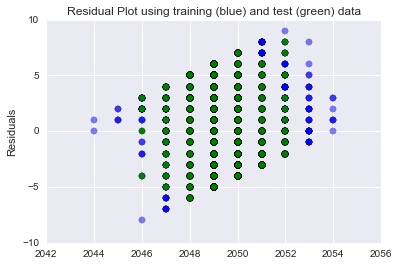

In [93]:
# Residual plots
plt.scatter(predsTrain_Linear, predsTrain_Linear - y_train, c='b', s=40, alpha=0.5)
plt.scatter(predsTest_Linear, predsTest_Linear - y_test, c='g', s=40)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals');

In [94]:
# predictions (RF)

predsTrain_RF = np.ceil(pipeline_rf.predict(X_train))
predsTest_RF = np.ceil(pipeline_rf.predict(X_test))

In [95]:
# predictions (XGB)

predsTrain_XGB = np.ceil(pipeline_xgb.predict(X_train))
predsTest_XGB = np.ceil(pipeline_xgb.predict(X_test))

In [70]:
# predictions (ensemble)

predictionTrain_ensemble = (( 0.6 * pipeline_reg.predict(X_train) + 0.4 * pipeline_xgb.predict(X_train)))
predictionTest_ensemble = (( 0.6 * pipeline_reg.predict(X_test) + 0.4 * pipeline_xgb.predict(X_test)))

predictionTrain_ensemble = np.ceil(predictionTrain_ensemble)
predictionTest_ensemble = np.ceil(predictionTest_ensemble)

In [96]:
print 'Root Mean Square Error on the training examples for Linear Regression %f ' %(np.sqrt(mean_squared_error(y_train, predsTrain_Linear)))
print 'Root Mean Square Error on the test examples for Linear Regression %f ' %(np.sqrt(mean_squared_error(y_test, predsTest_Linear)))

Root Mean Square Error on the training examples for Linear Regression 3.407395 
Root Mean Square Error on the test examples for Linear Regression 3.393785 


In [97]:
print 'Root Mean Square Error on the training examples for RF %f ' %(np.sqrt(mean_squared_error(y_train, predsTrain_RF)))
print 'Root Mean Square Error on the test examples for RF %f ' %(np.sqrt(mean_squared_error(y_test, predsTest_RF)))

Root Mean Square Error on the training examples for RF 1.422248 
Root Mean Square Error on the test examples for RF 3.519312 


In [98]:
print 'Root Mean Square Error on the training examples for XGBoost %f ' %(np.sqrt(mean_squared_error(y_train, predsTrain_XGB)))
print 'Root Mean Square Error on the test examples for XGBoost %f ' %(np.sqrt(mean_squared_error(y_test, predsTest_XGB)))

Root Mean Square Error on the training examples for XGBoost 1.194880 
Root Mean Square Error on the test examples for XGBoost 3.530659 


In [71]:
print 'Root Mean Square Error on the training examples for ensemble %f ' %(np.sqrt(mean_squared_error(y_train, predictionTrain_ensemble)))
print 'Root Mean Square Error on the test examples for ensemble %f ' %(np.sqrt(mean_squared_error(y_test, predictionTest_ensemble)))

Root Mean Square Error on the training examples for ensemble 2.346511 
Root Mean Square Error on the test examples for ensemble 3.423124 


In [99]:
## fit on the whole dataset
pipeline_reg.fit(training, y)
# pipeline_xgb.fit(training, y)

Pipeline(steps=[('ft', FeatureTransformer()), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [100]:
# predictions
preds_linear = np.ceil(pipeline_reg.predict(test))
# preds_xgb = pipeline_xgb.predict(test)

# preds_ensemble = 0.6 * preds_linear + 0.4 * preds_xgb
# preds_ensemble = np.ceil(preds_ensemble)

In [101]:
# Submissions
submission_df = pd.DataFrame({'record_id': test.record_id.values, 'year': preds_linear})

In [102]:
submission_df.to_csv('./submissions/third_regression.csv', sep='\t', index=False)